In [1]:
#importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from scipy.stats import mode

In [2]:
#generating sample data
X,y_true = make_blobs(n_samples = 500,centers = 3,cluster_std = 0.6,random_state = 42)


In [3]:
#applying kmeans clustering
kmeans = KMeans(n_clusters = 3,random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [4]:
#adjusting cluster label to match true labels
labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans==i)
    labels[mask] = mode(y_true[mask],keepdims=True)[0]

In [5]:
#calculating accuracy
accuracy = accuracy_score(y_true,labels)
print(f'\n Model Accuracy = {accuracy:.2f}')


 Model Accuracy = 1.00


In [6]:
#confusion matrix
cm = confusion_matrix(y_true,labels)
print(cm)

[[167   0   0]
 [  0 167   0]
 [  0   0 166]]


In [7]:
#clasification report
cf = classification_report(y_true,labels)
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       166

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



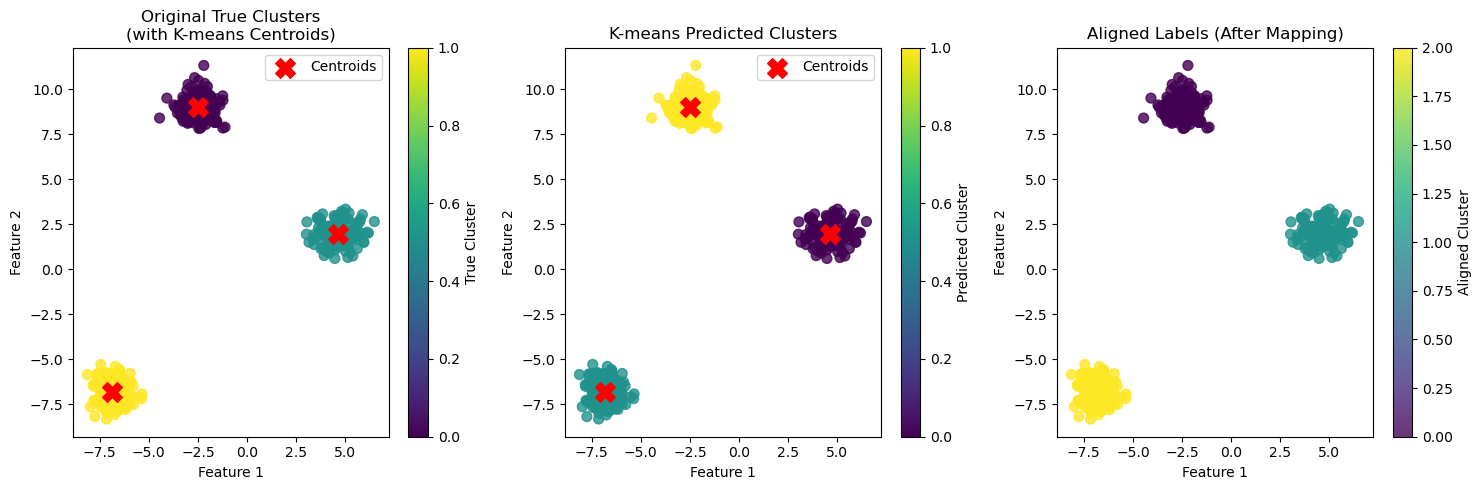

In [8]:
#visualizing clusters
# 1. Original Data vs K-means Clustering
plt.figure(figsize=(15, 5))

# Subplot 1: Original True Clusters
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('Original True Clusters\n(with K-means Centroids)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='True Cluster')

# Subplot 2: K-means Predicted Clusters
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Predicted Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Predicted Cluster')

# Subplot 3: Aligned Labels Comparison
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Aligned Labels (After Mapping)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Aligned Cluster')

plt.tight_layout()
plt.show()



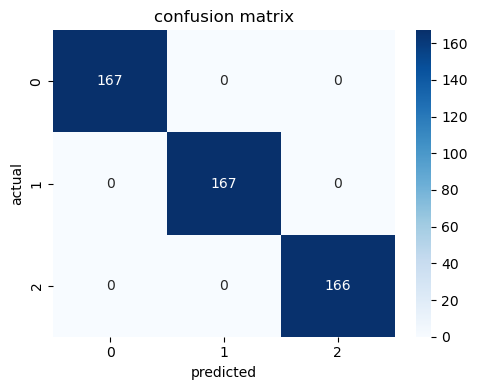

In [9]:
#confusion matrix heatmap
plt.figure(figsize = (5,4))
sns.heatmap(cm,annot = True,fmt = 'd',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.tight_layout()

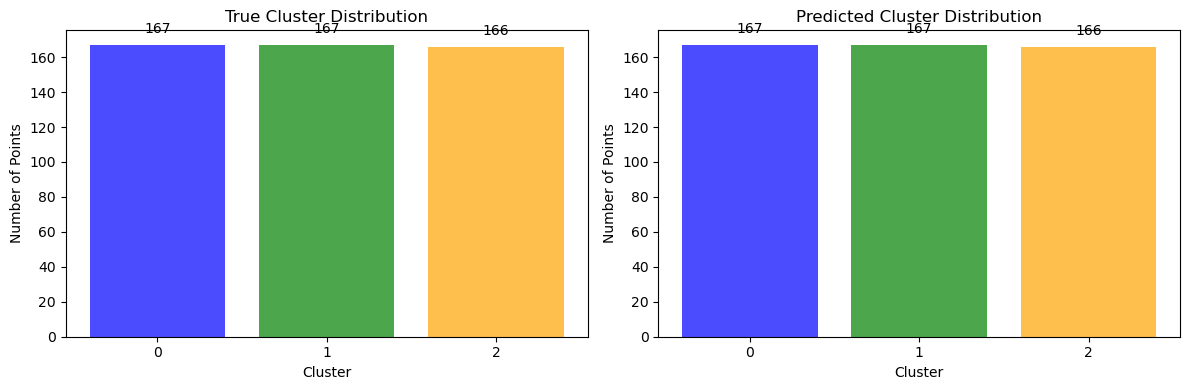

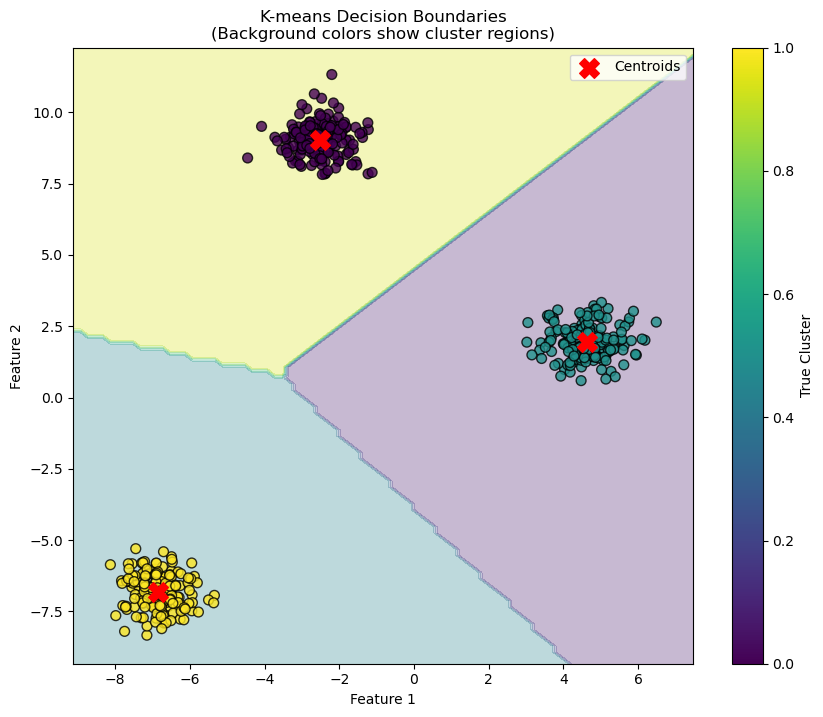

In [10]:
plt.figure(figsize=(12, 4))

# Subplot 1: True distribution
plt.subplot(1, 2, 1)
true_counts = np.bincount(y_true)
plt.bar(range(3), true_counts, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title('True Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(range(3))

# Add count labels on bars
for i, count in enumerate(true_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Subplot 2: Predicted distribution
plt.subplot(1, 2, 2)
pred_counts = np.bincount(labels)
plt.bar(range(3), pred_counts, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title('Predicted Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(range(3))

# Add count labels on bars
for i, count in enumerate(pred_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Decision Boundaries (Optional - more advanced)
from matplotlib.colors import ListedColormap

# Create mesh grid for decision boundaries
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict clusters for mesh points
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Decision Boundaries\n(Background colors show cluster regions)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='True Cluster')
plt.show()